In [46]:
%load_ext autoreload
%autoreload 2

import os
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

from visualization_functions import plot_attention, heatmap_overlay, VisType

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
# replace with the path to the codecharts raw images
IMAGES_FOLDER = "codecharts_data/raw_img"
# replace with the path to the predictions or ground-truth data you want to plot
DATA_FOLDER = "mdsem_preds"
# replace with the times you want to plot (in ms)
DURATIONS = [500, 3000, 5000]

imnames = sorted(os.listdir(os.path.join(DATA_FOLDER, str(DURATIONS[0]))))
print("Found {} images".format(len(imnames)))

Found 1000 images


In [48]:
def load_img_color(impath): 
    im = cv2.imread(impath)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def load_img_grayscale(impath): 
    return cv2.imread(impath, cv2.IMREAD_GRAYSCALE)

## Demo different heatmap styles

In [49]:
image_to_use = imnames[0]
raw_img_path = os.path.join(IMAGES_FOLDER, image_to_use)
heatmap_path = os.path.join(DATA_FOLDER, str(DURATIONS[0]), imnames[0])

print(raw_img_path, heatmap_path)

codecharts_data/raw_img/CAT2000Actions_001.jpg mdsem_preds/500/CAT2000Actions_001.jpg


In [50]:
im = load_img_color(raw_img_path)
h, w, c = im.shape
heatmap_im = load_img_grayscale(heatmap_path)
resized_hm_im = cv2.resize(heatmap_im, (w,h))
im.shape, resized_hm_im.shape

((1340, 1786, 3), (1340, 1786))

[]

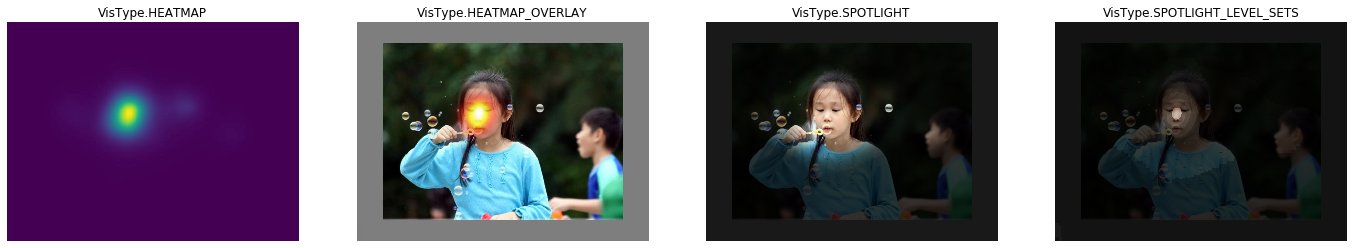

In [51]:
fig, ax = plt.subplots(1, 4, figsize=(24, 8))

for i, vistype in enumerate(VisType):
    plot_attention(heatmap_path, im, resized_hm_im, ax=ax[i], plottype=vistype, title=vistype)
plt.plot()

## Visualize predictions

In [52]:
ims_to_visualize = imnames[:10]
vistype = VisType.HEATMAP_OVERLAY

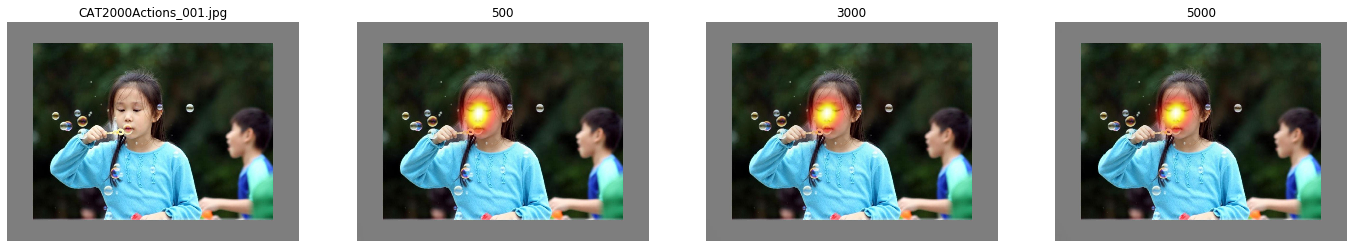

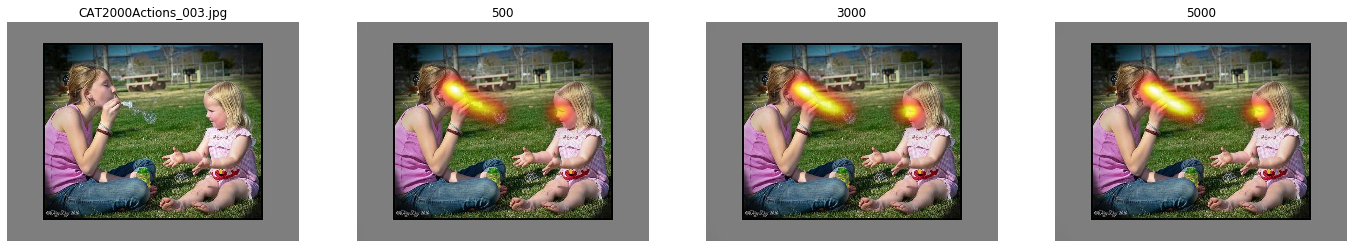

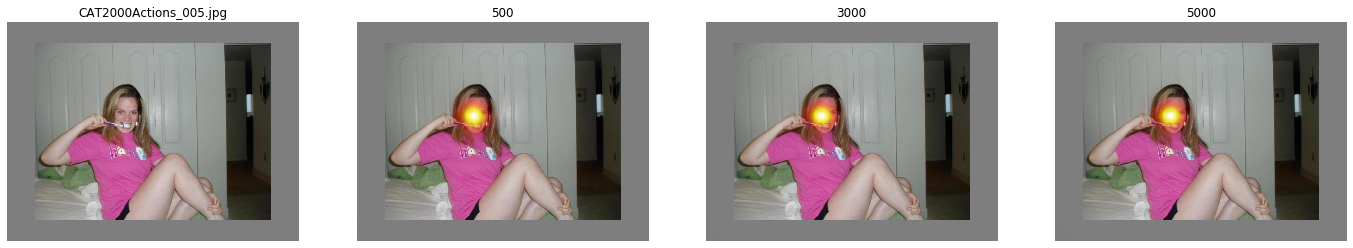

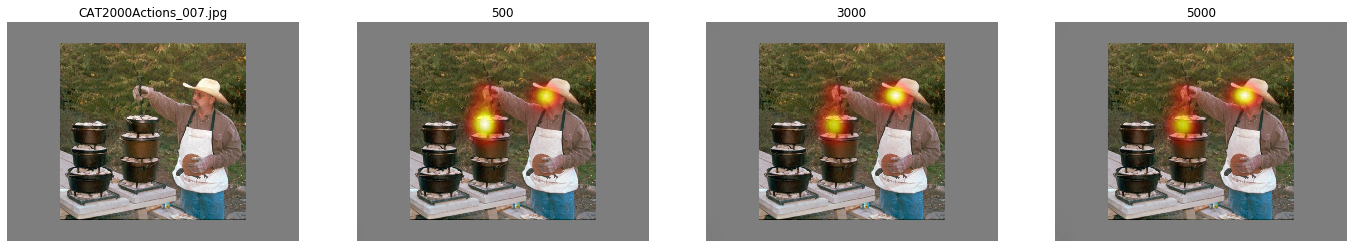

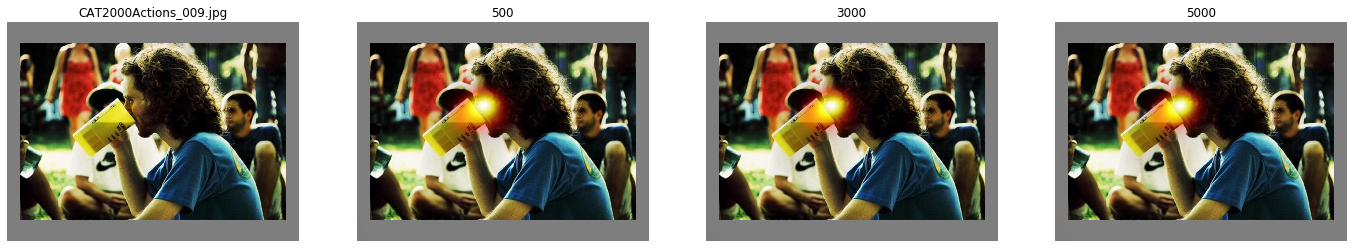

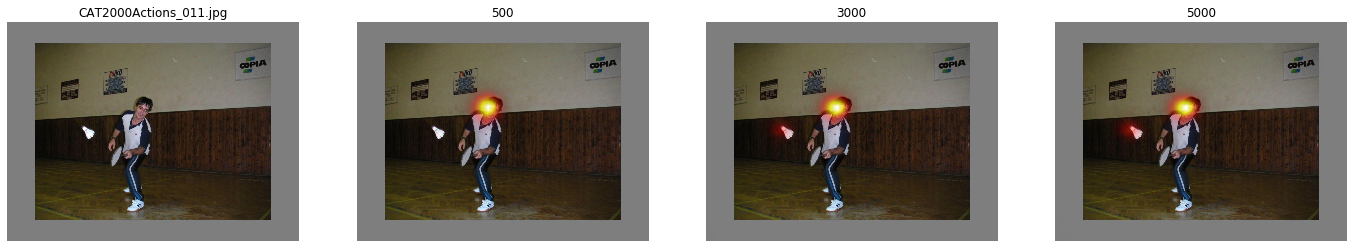

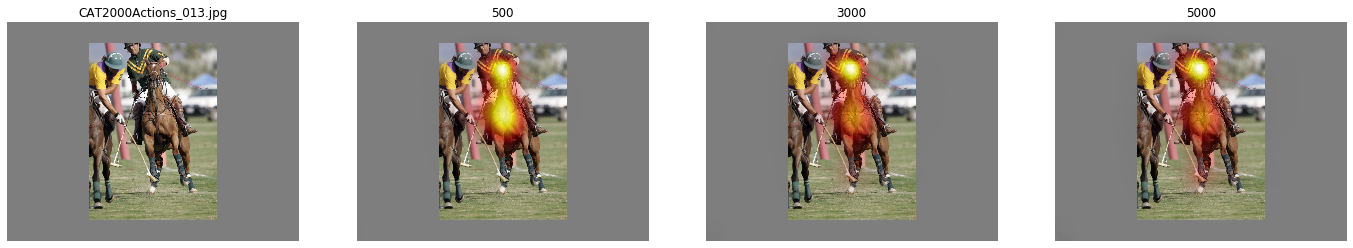

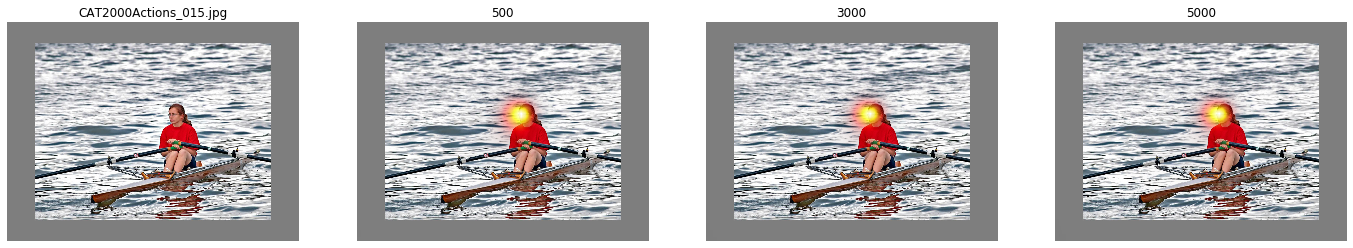

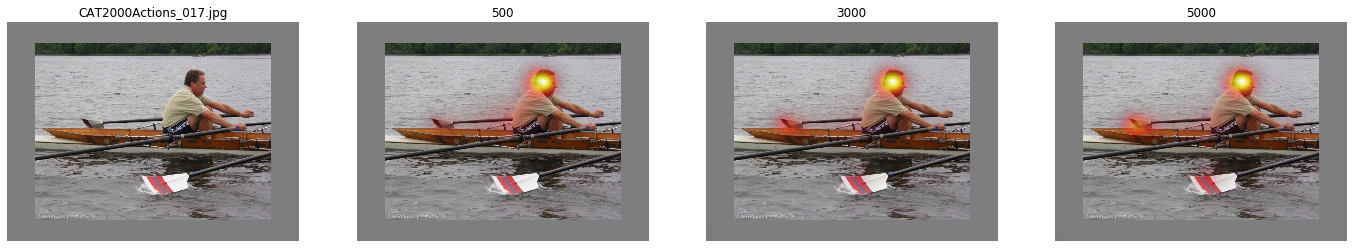

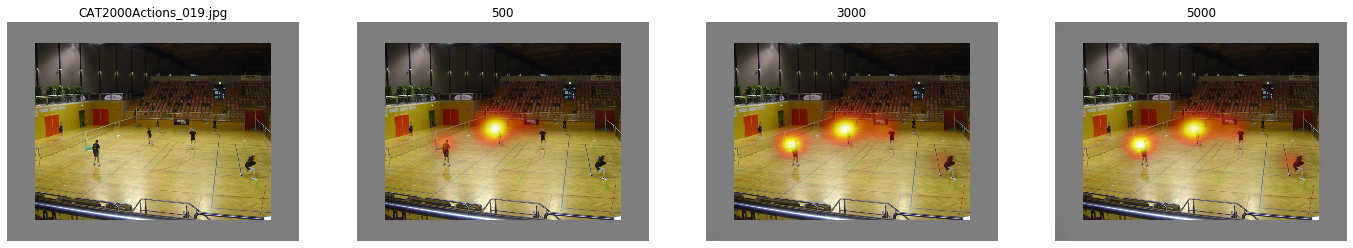

In [56]:
for imname in ims_to_visualize: 
    fig, ax = plt.subplots(1, len(DURATIONS)+1, figsize=(24, 8))
    raw_img_path = os.path.join(IMAGES_FOLDER, imname)
    im = load_img_color(raw_img_path)
    h, w, c = im.shape
    ax[0].imshow(im)
    ax[0].set_title(imname)
    ax[0].set_axis_off()
    
    for i, d in enumerate(DURATIONS): 
        heatmap_path = os.path.join(DATA_FOLDER, str(d), imname)
        heatmap_im = load_img_grayscale(heatmap_path)
        resized_hm_im = cv2.resize(heatmap_im, (w,h))
        plot_attention(heatmap_path, im, resized_hm_im, ax=ax[i+1], plottype=vistype, title=d)
    plt.plot()